In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math 
import copy 
import time
from scipy import stats
import itertools

In [2]:
# Min heap, the keys of parent nodes are less than or equal to those of the 
# children and the lowest's key is in the root node
class Heap:          
    # The init method or constructor  
    def __init__(self, howMany):  
        self.maxSize = howMany   #maximum number of items that can be stored
        self.graphToHeap = {}   #maps a graph node index to its index in the heap
        self.heapToGraph = {}   #maps an index in the heap its graph node index
        self.lastIndex = -1     #index of the last item in the heap
        self.minCost = np.ones((self.maxSize)) * float('inf') #allocate the memory

    # PUBLIC methods
    def empty(self):
        return self.lastIndex == -1

    def getMinCost(self, graphIndex):
        x=self.heapToGraph[graphIndex]
        return self.minCost[x]

    def push(self, graphIndex, value):
        # if self.lastIndex+1 >= self.maxSize:
        #     return

        self.lastIndex= self.lastIndex+1
        self.minCost[self.lastIndex] = value
        self.graphToHeap[graphIndex] = self.lastIndex
        self.heapToGraph[self.lastIndex] = graphIndex
        
        current = self.lastIndex
        #heapify upwards
        while (current>0 and self.minCost[current] < self.minCost[self._parent(current)]):
            self.swap(current, self._parent(current))
            current = self._parent(current)

    def pop(self):
        if not self.empty():
          popped = self.minCost[0]
          x= self.heapToGraph[0]
          self.minCost[0] = self.minCost[self.lastIndex]
          self.minCost[self.lastIndex] = float('inf')
          y = self.heapToGraph[self.lastIndex]
          self.heapToGraph[0] = y
          self.lastIndex = self.lastIndex - 1
          self.graphToHeap[y] = 0
          self.heapify(0) #heapify down
          return (x,popped)

    def promote(self, graphIndex, newCost):
        self.minCost[self.graphToHeap[graphIndex]] = newCost
        # heapify from the parent or not
        self.heapify(self.graphToHeap[graphIndex])

    #heapify down 
    def heapify(self, x):
        if not ((x >= ((self.lastIndex)//2) and x <= self.lastIndex)):
            if (self.minCost[x] > self.minCost[self._leftC(x)] or self.minCost[x] > self.minCost[self._rightC(x)]):

                if self.minCost[self._leftC(x)] < self.minCost[self._rightC(x)]:
                    self.swap(x, self._leftC(x))
                    self.heapify(self._leftC(x))
                else:
                    self.swap(x, self._rightC(x))
                    self.heapify(self._rightC(x))

    def printHeap(self):
        # useful for debugging
        for i in range(0, self.maxSize//2):
            if self._rightC(i) < self.maxSize:
                print("p = %5.3f l = %5.3f r = %5.3f" % 
                        (self.minCost[i], self.minCost[self._leftC(i)], self.minCost[self._rightC(i)]))
            else:
                print("p = %5.3f l = %5.3f" % 
                        (self.minCost[i], self.minCost[self._leftC(i)]))

    def _parent(self, index):
        return math.floor((index -1)/2)
    
    def _leftC(self, index):
        return 2*index + 1
    
    def _rightC(self, index):
        return 2*index + 2
    
    def isInMinHeap(self, v):
 
        if self.minCost[v] < self.lastIndex:
            return True
        return False

    def swap(self, x, y):
        i = self.heapToGraph[x]
        j = self.heapToGraph[y]
        
        self.minCost[x], self.minCost[y] = self.minCost[y], self.minCost[x]
        
        self.graphToHeap[i]= y
        self.graphToHeap[j]= x
        
        self.heapToGraph[x] = j
        self.heapToGraph[y] = i
        



In [13]:
# Test push and pop 
N = 8
PQ = Heap(N)
values = [i*10.0 for i in range(0, N)]
print("\n\nTest with same order push pop")
for i in range(0, N):
    print("push %s" % str((i, values[i])))
    PQ.push(i, values[i])
PQ.printHeap()
for i in range(0, N):
    print("pop %s " % (str(PQ.pop())))



Test with same order push pop
push (0, 0.0)
push (1, 10.0)
push (2, 20.0)
push (3, 30.0)
push (4, 40.0)
push (5, 50.0)
push (6, 60.0)
push (7, 70.0)
p = 0.000 l = 10.000 r = 20.000
p = 10.000 l = 30.000 r = 40.000
p = 20.000 l = 50.000 r = 60.000
p = 30.000 l = 70.000
pop (0, 0.0) 
pop (1, 10.0) 
pop (2, 20.0) 
pop (3, 30.0) 
pop (4, 40.0) 
pop (5, 50.0) 
pop (6, 60.0) 
pop (7, 70.0) 


In [12]:

N = 8
PQ = Heap(N)
values = [i*10.0 for i in range(0, N)]
random.shuffle(values)
print("\n\nTest with randomized order push pop")
for i in range(0, N):
    print("push %s" % str((i, values[i])))
    PQ.push(i, values[i])
PQ.printHeap()
for i in range(0, N):
    print("pop %s " % (str(PQ.pop())))



Test with randomized order push pop
push (0, 10.0)
push (1, 30.0)
push (2, 60.0)
push (3, 20.0)
push (4, 40.0)
push (5, 50.0)
push (6, 0.0)
push (7, 70.0)
p = 0.000 l = 20.000 r = 10.000
p = 20.000 l = 30.000 r = 40.000
p = 10.000 l = 60.000 r = 50.000
p = 30.000 l = 70.000
pop (6, 0.0) 
pop (0, 10.0) 
pop (3, 20.0) 
pop (1, 30.0) 
pop (4, 40.0) 
pop (5, 50.0) 
pop (7, 70.0) 
pop (2, 60.0) 


In [11]:
# test promote
N = 8
PQ = Heap(N)
values = [i*10.0 for i in range(0, N)]
random.shuffle(values)
print("\n\nTest with randomized order promote ")
for i in range(0, N):
    print("push %s" % str((i, values[i])))
    PQ.push(i, values[i])
PQ.printHeap()
for i in range(0, N):
    PQ.promote(i, -1)
    print("pop %s " % (str(PQ.pop())))



Test with randomized order promote 
push (0, 50.0)
push (1, 60.0)
push (2, 30.0)
push (3, 10.0)
push (4, 40.0)
push (5, 0.0)
push (6, 20.0)
push (7, 70.0)
p = 0.000 l = 30.000 r = 10.000
p = 30.000 l = 60.000 r = 40.000
p = 10.000 l = 50.000 r = 20.000
p = 60.000 l = 70.000
pop (5, 0.0) 
pop (3, 10.0) 
pop (0, -1.0) 
pop (2, -1.0) 
pop (1, -1.0) 
pop (4, -1.0) 
pop (6, -1.0) 
pop (7, -1.0) 


In [3]:
def lowestCost (graph, goalV,N):
  bestCost={}
  heap = Heap(N)
  for i in range(N):
    heap.push(i, float('inf'))
    bestCost[i] = float('inf')
  heap.promote(goalV,0)
  bestCost[goalV] = 0

  while not heap.empty():
    v = heap.pop()
    vert= v[0]
    for i in range(vert):
      newCost = bestCost[vert]+ graph[vert][i]
      if newCost < bestCost[i]: # if updated, then promote the vertex in the min-heap
        bestCost[i] = newCost
        heap.promote(i, newCost)
  
  return bestCost



In [4]:
import math
def generate_graph(n, maxCost):
  graph = [[0] * n for i in range(0, n)]
  for col in range(0, n):
    for row in range(0, n):
      if col == row:
        continue
      elif col < row:
        cost = random.randint(0, maxCost + 1)
        if cost == maxCost + 1:
          graph[row][col] = math.inf
          graph[col][row] = math.inf
        else:
          graph[row][col] = cost
          graph[col][row] = cost
  return graph

In [5]:
#Test the Dijkstras algorithm
problemSizes = [2**i for i in range(2, 10)]
#print(problemSizes)
for i in problemSizes:
  problemList = (generate_graph(i,20), random.randint(1,i-1) , i)
  print(lowestCost(*problemList))

{0: 10, 1: 9, 2: 8, 3: 0}
{0: 4, 1: 13, 2: 0, 3: inf, 4: inf, 5: inf, 6: inf, 7: inf}
{0: 10, 1: 18, 2: 10, 3: 13, 4: 12, 5: 0, 6: inf, 7: inf, 8: inf, 9: inf, 10: inf, 11: inf, 12: inf, 13: inf, 14: inf, 15: inf}
{0: 1, 1: 1, 2: 1, 3: 1, 4: 2, 5: 7, 6: 6, 7: 1, 8: 0, 9: 1, 10: 0, 11: 1, 12: 8, 13: 1, 14: 3, 15: 6, 16: 2, 17: 6, 18: 6, 19: 1, 20: 2, 21: 33, 22: 20, 23: 0, 24: inf, 25: inf, 26: inf, 27: inf, 28: inf, 29: inf, 30: inf, 31: inf}
{0: 3, 1: 12, 2: 9, 3: 0, 4: 5, 5: 3, 6: 0, 7: inf, 8: inf, 9: inf, 10: inf, 11: inf, 12: inf, 13: inf, 14: inf, 15: inf, 16: inf, 17: inf, 18: inf, 19: inf, 20: inf, 21: inf, 22: inf, 23: inf, 24: inf, 25: inf, 26: inf, 27: inf, 28: inf, 29: inf, 30: inf, 31: inf, 32: inf, 33: inf, 34: inf, 35: inf, 36: inf, 37: inf, 38: inf, 39: inf, 40: inf, 41: inf, 42: inf, 43: inf, 44: inf, 45: inf, 46: inf, 47: inf, 48: inf, 49: inf, 50: inf, 51: inf, 52: inf, 53: inf, 54: inf, 55: inf, 56: inf, 57: inf, 58: inf, 59: inf, 60: inf, 61: inf, 62: inf, 63: inf}

In [6]:
def avgtimeCompareFunctions(problemList, functionList, init = None, fit = 'exponential'):
    plt.xlabel("Problem size")
    plt.yscale('log')
    if fit == 'polynomial':
      plt.xscale('log')
    plt.ylabel("time in milliseconds")
    plt.rcParams["figure.figsize"] = [16,9]
    values = [size for (size, args) in problemList]
    for function in functionList:
      functionName = str(function).split(" ")[1]
      timeLine = []
      for (size, args) in problemList:
        start_time = time.time()
        function(*args) #use the * to unpack the tuple into arguments to the function
        elapsed = (time.time() - start_time)*1000.0
        timeLine.append(elapsed)
      ##Generating the plot between time taken by each function call with n as variable and n
      plt.plot(values, timeLine, label = functionName)
      # fit these timing studies to a curve
      if fit == 'exponential': #fit a straight line to n and log time
        slope, intercept, _, _, _ = stats.linregress([values], [np.log(t) for t in timeLine])
        print("Function %s time = %.6f %.3f ^ n" % (functionName, np.exp(intercept), np.exp(slope)))
      elif fit == 'polynomial': # fit a straight line to log n and log time
        slope, intercept, _, _, _ = stats.linregress([np.log(v) for v in values], [np.log(t) for t in timeLine])
        print("Function %s time = %.6f n ^ %.3f" % (functionName, np.exp(intercept), slope))
    plt.legend(loc='upper left')
    plt.show()


Function lowestCost time = 0.002420 n ^ 1.560


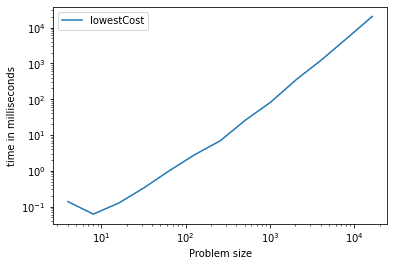

In [7]:
problemSizes = [2**i for i in range(2, 15)]
#print(problemSizes)
problemList = [(i, (generate_graph(i,20), random.randint(1,i-1) , i)) for i in problemSizes]
#print(problemList)
functionList=[lowestCost]
avgtimeCompareFunctions(problemList, functionList, init = None, fit = 'polynomial')

The graph above gives a run time Function lowestCost time = 0.001967 n ^ 1.581 .Matches nlog(n) runtime.


Time Complexity: The time complexity of the above algo looks O(V^2) as there is for loop inside a while loop. If we take a closer look, we can observe that the statements in inner loop are executed O(V+E) times. The min heap has a number of operations which takes no more than O(LogV) time. So overall time complexity is O(E+V)*O(LogV) which is O((E+V)*LogV) = O(NLogN) 


Distance = False Density = 0.500 **********************************************

Distance = False Density = 1.000 **********************************************

Distance = True Density = 0.500 **********************************************

Distance = True Density = 1.000 **********************************************


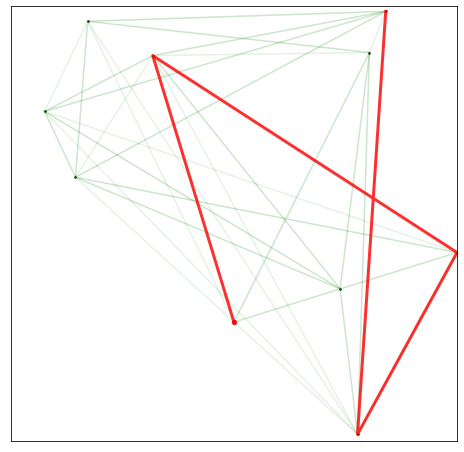

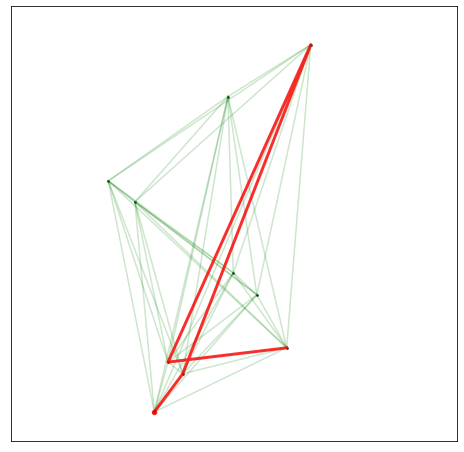

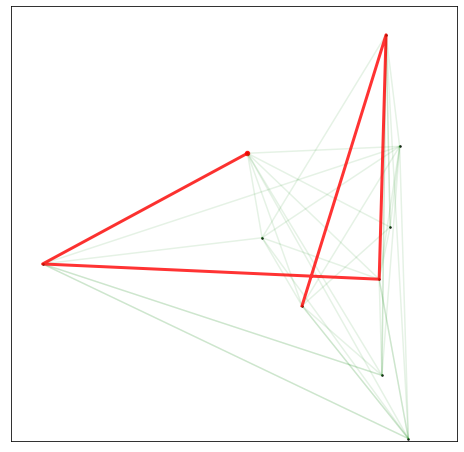

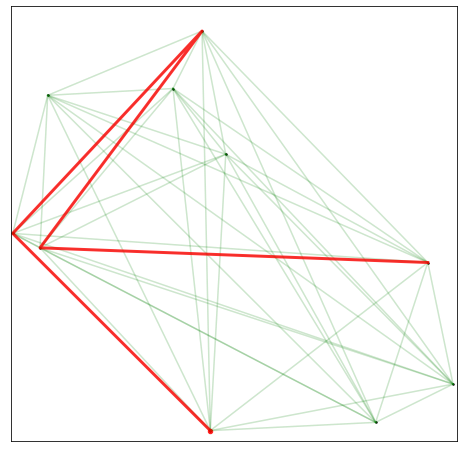

In [4]:
Xrange = 200
Yrange = 200
class Graph:          
    # The init method or constructor  
    def __init__(self, N, matrix, density = 1.0, debug = False, distanceCosts = False, display = False):  
        self.size = N  #number of nodes in the graph
        self.matrix = matrix   # if true then use a matrix representation, otherwise a list
        self.density = density   #density of connectivity in the graph
        self.maxEdgeCost = 10000
        self.display = display
        if display:
            self.fig, self.plt = plt.subplots(figsize=(8, 8), facecolor='white')
        if matrix:
            (g, XYs) = self._createGraph_Matrix(N, density, debug, distanceCosts)
        else:
            (g, XYs) = self._createGraph_List(N, density, debug, distanceCosts)
        self.graph = g
        self.XYs = XYs

    # Public methods
    def getSize(self):
        return self.size

    def getEdges(self, nodeId):
        if self.matrix:
            return [(i, self.graph[nodeId,i]) for i in range(0, self.size)]
        return self.graph[nodeId]

    def renderGraph(self, path = [], drawEdges = False, goalID = 0):
        if not self.display:
            return
        self.plt.cla()
        self.plt.set_xlim(Xrange*-1, Xrange)
        self.plt.set_ylim(Yrange*-1, Yrange)
        self.plt.set_xticks([])
        self.plt.set_yticks([])
        # nodes
        self.plt.scatter([x for (x,_) in self.XYs], [y for (_, y) in self.XYs], color = 'black', 
                        marker=".", s=10, alpha = 0.8)
        self.plt.scatter([x for (x, _) in [self.XYs[goalID]]], [y for (_, y) in [self.XYs[goalID]]], color = 'red', 
                        marker="o", s=20, alpha = 0.8)
        if drawEdges:
            for i in range(0, self.size):
                (xI, yI) = self.XYs[i]
                for (j, cost) in self.getEdges(i):
                    (xJ, yJ) = self.XYs[j]
                    self.plt.plot([xI, xJ], [yI, yJ], color = 'green', alpha = 0.1)
        self.plt.plot([self.XYs[graphIndex][0] for graphIndex in path], [self.XYs[graphIndex][1] for graphIndex in path], 
                          color = 'red', linewidth = 3, alpha = 0.8)
        self.fig.show()
            
    
    def _createGraph_Matrix(self, N, density, debug, distanceCosts):
        
        XYs = [(random.uniform(-Xrange, +Xrange), random.uniform(-Yrange, +Yrange)) for i in range(0,N)]
        g = np.random.random((N, N)) * self.maxEdgeCost
        # fill in blocked edges based on density
        for i in range(0,N): 
            for j in range(0,N):
                if np.random.random_sample() >= density:
                    g[i,j] = float('inf') 
                elif distanceCosts:
                    g[i,j] = self._distance(XYs[i], XYs[j])
                else:
                    g[i,j] = random.randint(1, int(self.maxEdgeCost))
        #set self edge costs to 0
        for i in range(0,N): 
            g[i,i] = 0
        if debug: # graph with at least one low-cost path
            # build one bi-directional path through the graph
            for i in range(0,N): 
                g[(i-1)%N,i] = 1
        return (g, XYs)

    def _createGraph_List(self, N, density, debug, distanceCosts):
        (g, XYs) = self._createGraph_Matrix(N, density, debug, distanceCosts)
        return (self._convertToList(g), XYs)

    def _distance(self, xy0, xy1):
        (x0, y0) = xy0
        (x1, y1) = xy1
        return np.sqrt(x0*x0 + y0*y0)

    def _convertToList(self, g):
        # returns a list of lists of the graph
        # let gL be this list,
        # then gL[i] represents the ith node
        # and is a list of the form [.... , (j, g[i,j]), .....]
        # each tuple is (node connectd to i, the cost from i to j )
        return [[(j, g[i,j]) for j in range(0,N) if g[i,j] != float("inf")] for i in range(0,N)]




N = 10
for distance in [False, True]:
    for density in [0.5, 1.0]:
        print("\nDistance = %s Density = %5.3f **********************************************" % (str(distance), density))
        graph = Graph(N, matrix = False, density = density, distanceCosts = distance, display = True)
        path = [i for i in range(0, 5)]
        graph.renderGraph(path = [i for i in range(0, 5)], drawEdges = True, goalID = 0)
        #input("Press Enter to continue...")

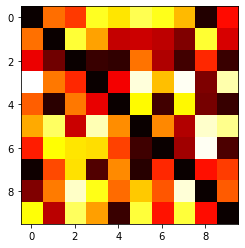

In [8]:
#Heat Map representation of the adjacency matrix
graph = Graph(10,True)
g = graph._createGraph_Matrix(10,1,False,False)
arr =np.array(g[0])
plt.imshow(arr,cmap='hot',interpolation='none')
plt.show()

A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.  Here, all the origin nodes are represented as row, and all the destination nodes as columns. The diagonal pops out with a lot of black squares, which means that cost of a node to itself is 0.


Distance = False Density = 0.500 **********************************************

Distance = True Density = 0.500 **********************************************

Distance = False Density = 1.000 **********************************************

Distance = True Density = 1.000 **********************************************


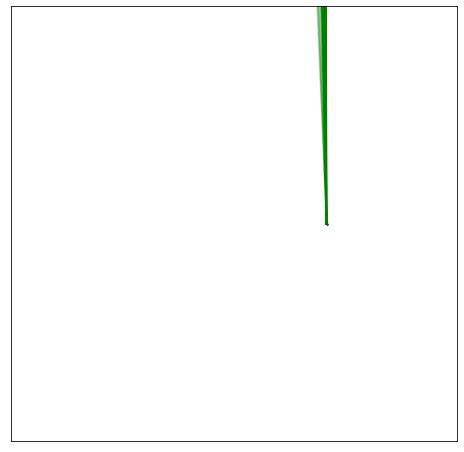

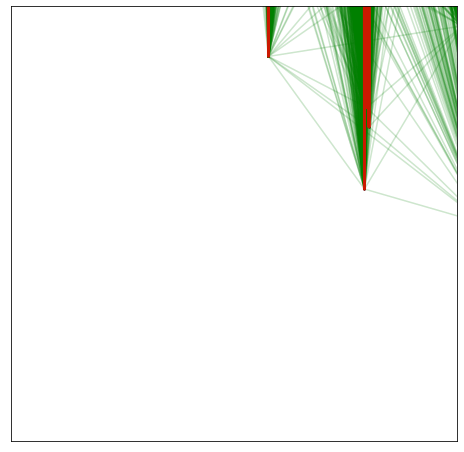

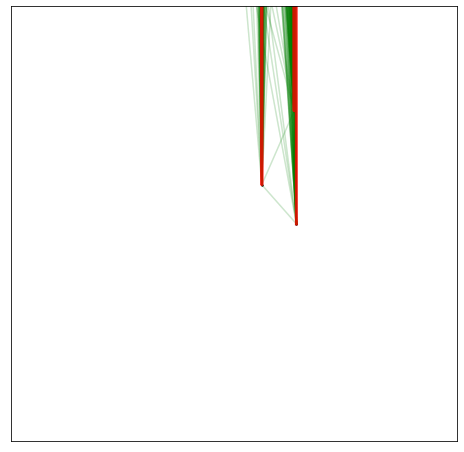

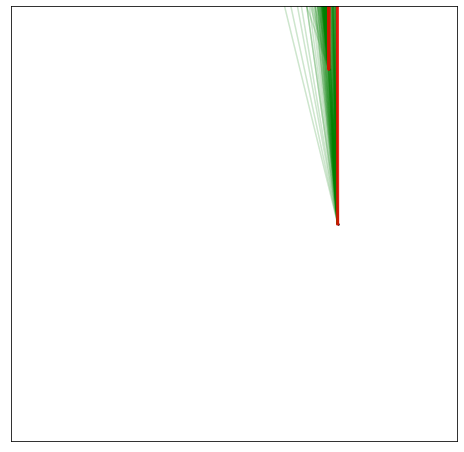

In [5]:
density=[0.5,1.0]
nodes=[256]
distance=[False,True]
all_list = [nodes,density,distance]

problem_list=itertools.product(*all_list)
for problem in problem_list:
  print("\nDistance = %s Density = %5.3f **********************************************" % (str(problem[2]), problem[1]))
  graph = Graph(problem[0], matrix = True, density= problem[1], distanceCosts = distance, display = True)
  g= graph._createGraph_Matrix(problem[0],problem[1],False,False)
  res=lowestCost(g[0],random.randint(1,problem[0]-1),problem[0])
  arr = np.array(list(res.items())) 
  graph.XYs= arr
  graph.renderGraph(path = [i for i in range(len(arr))], drawEdges = True, goalID = 0)
  





Distance = False Density = 2.500 **********************************************

Distance = True Density = 2.500 **********************************************


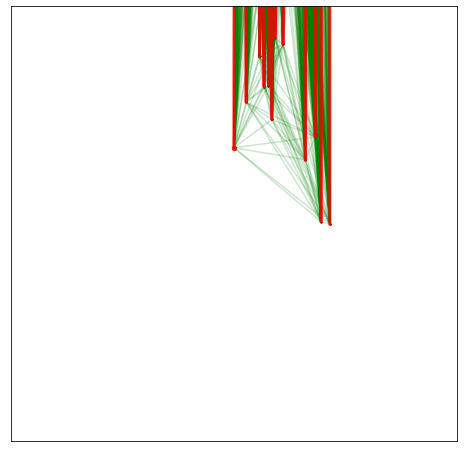

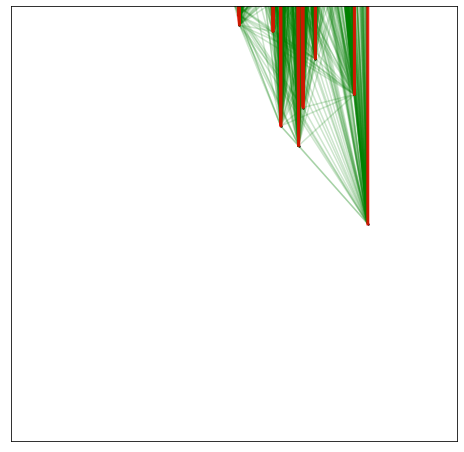

In [8]:
density=[2.5]
nodes=[128]
distance=[False,True]
all_list = [nodes,density,distance]

problem_list=itertools.product(*all_list)
for problem in problem_list:
  print("\nDistance = %s Density = %5.3f **********************************************" % (str(problem[2]), problem[1]))
  graph = Graph(problem[0], matrix = True, density= problem[1], distanceCosts = distance, display = True)
  g= graph._createGraph_Matrix(problem[0],problem[1],False,False)
  res=lowestCost(g[0],random.randint(1,problem[0]-1),problem[0])
  arr = np.array(list(res.items())) 
  graph.XYs= arr
  graph.renderGraph(path = [i for i in range(len(arr))], drawEdges = True, goalID = 0)
  





Distance = False Density = 0.500 **********************************************

Distance = True Density = 0.500 **********************************************

Distance = False Density = 1.000 **********************************************

Distance = True Density = 1.000 **********************************************

Distance = False Density = 0.500 **********************************************

Distance = True Density = 0.500 **********************************************

Distance = False Density = 1.000 **********************************************

Distance = True Density = 1.000 **********************************************

Distance = False Density = 0.500 **********************************************

Distance = True Density = 0.500 **********************************************

Distance = False Density = 1.000 **********************************************

Distance = True Density = 1.000 **********************************************


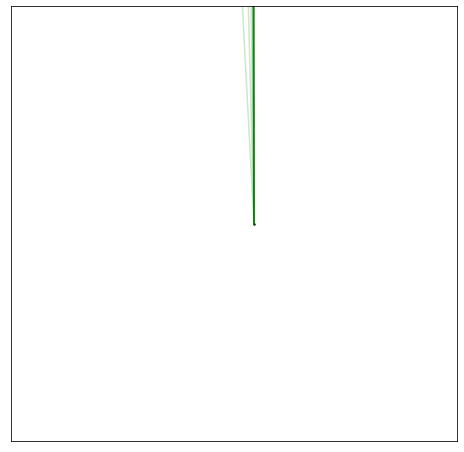

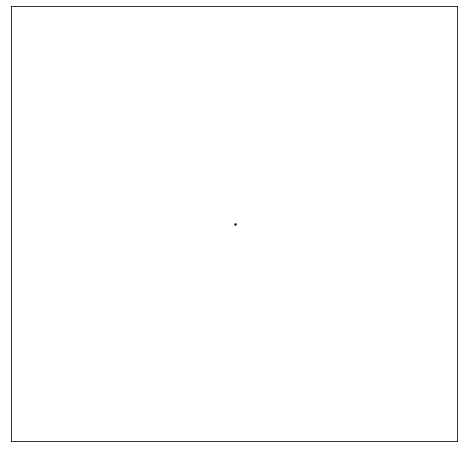

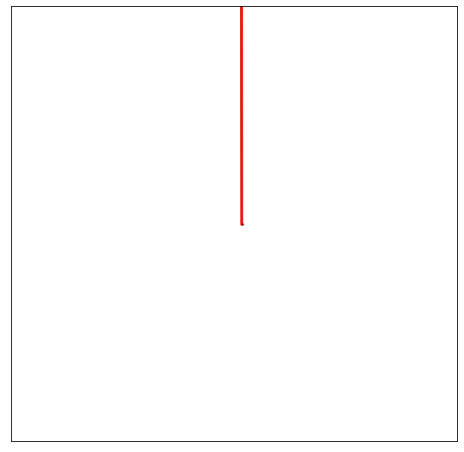

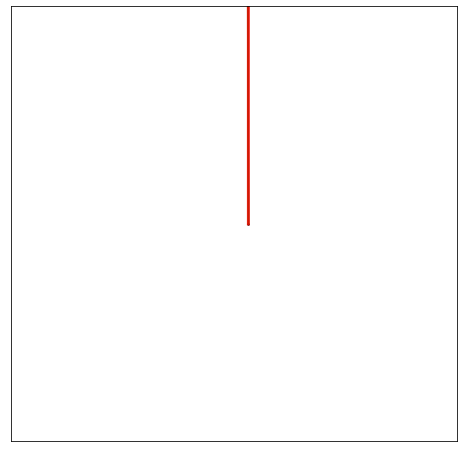

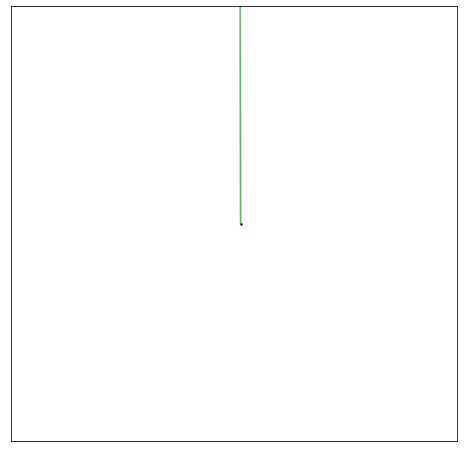

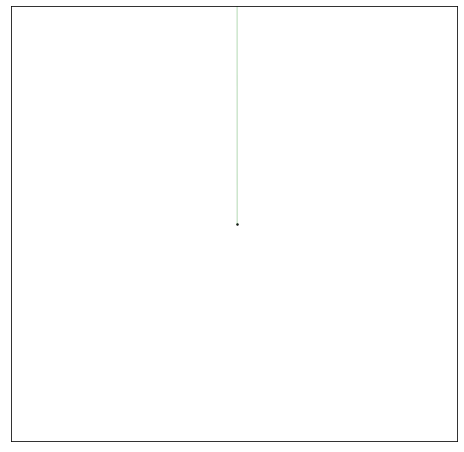

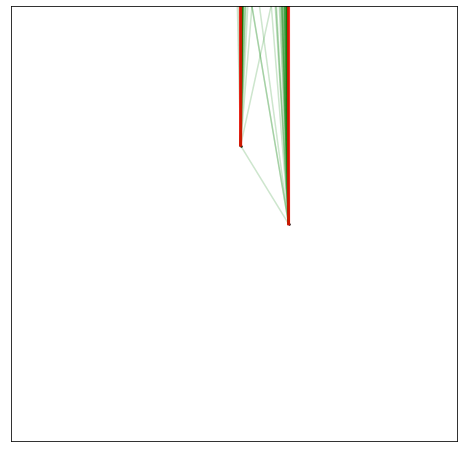

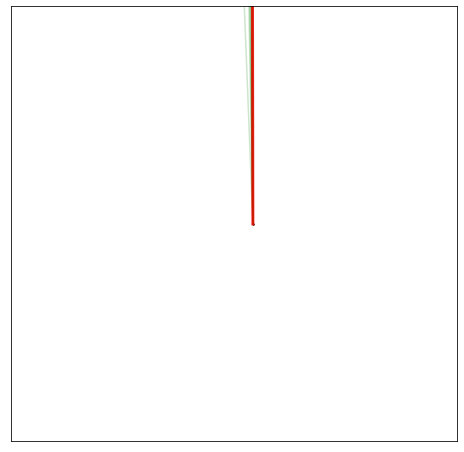

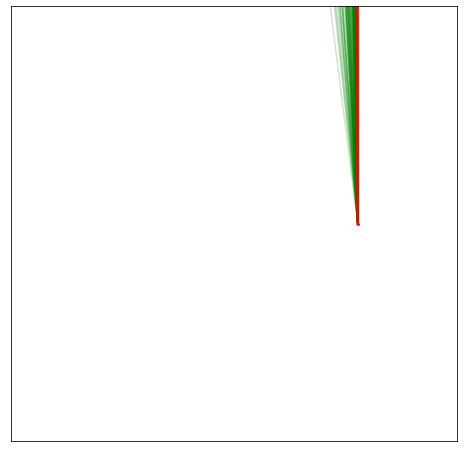

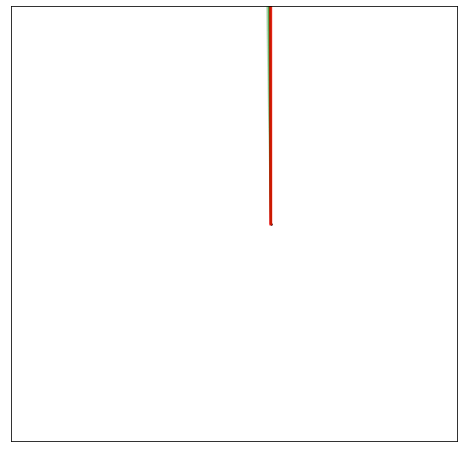

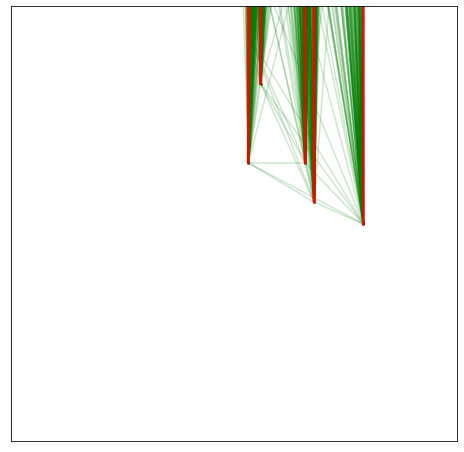

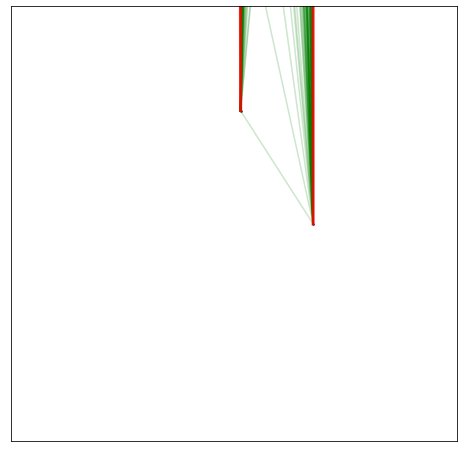

In [6]:
#Visualization graph: using the lowest cost algorithm to identify path using visualization
density=[0.5,1.0]
nodes=[2**i for i in range(5,8)]
distance=[False,True]
all_list = [nodes,density,distance]

problem_list=itertools.product(*all_list)
for problem in problem_list:
  print("\nDistance = %s Density = %5.3f **********************************************" % (str(problem[2]), problem[1]))
  graph = Graph(problem[0], matrix = True, density= problem[1], distanceCosts = distance, display = True)
  g= graph._createGraph_Matrix(problem[0],problem[1],False,False)
  res=lowestCost(g[0],random.randint(1,problem[0]-1),problem[0])
  arr = np.array(list(res.items())) 
  graph.XYs= arr
  graph.renderGraph(path = [i for i in range(len(arr))], drawEdges = True, goalID = 0)
  #input("Press Enter to continue...")

